<a href="https://colab.research.google.com/github/thanvika3639/linear-regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv("/content/Housing.csv")

X = df.drop("price", axis=1)
y = df["price"]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_cols)],
    remainder="passthrough"
)

X_processed = preprocessor.fit_transform(X)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 970043.4039201695
MSE: 1754318687330.703
R²: 0.6529242642153106


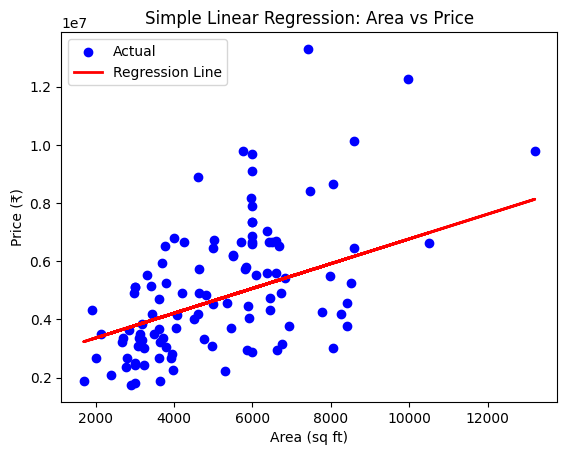

In [8]:
import matplotlib.pyplot as plt
import numpy as np

X_simple = df[['area']]
y_simple = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

y_pred_s = model_simple.predict(X_test_s)

plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (₹)')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [9]:

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coef_df)


                                 Feature   Coefficient
0                      cat__mainroad_yes  3.679199e+05
1                     cat__guestroom_yes  2.316100e+05
2                      cat__basement_yes  3.902512e+05
3               cat__hotwaterheating_yes  6.846499e+05
4               cat__airconditioning_yes  7.914267e+05
5                      cat__prefarea_yes  6.298906e+05
6   cat__furnishingstatus_semi-furnished -1.268818e+05
7      cat__furnishingstatus_unfurnished -4.136451e+05
8                        remainder__area  2.359688e+02
9                    remainder__bedrooms  7.677870e+04
10                  remainder__bathrooms  1.094445e+06
11                    remainder__stories  4.074766e+05
12                    remainder__parking  2.248419e+05
